In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [3]:
df = pd.read_excel('./dataset.xlsx', sheet_name='emergencia')

In [4]:
df.head()

,ID_ATENCION,INICIO_ATENCION,FIN_ATENCION,GENERO,ID_PACIENTE
0,37437,2023-01-01 00:32:37,2023-01-01 06:55:00,M,793160
1,37438,2023-01-01 02:13:29,2023-01-01 06:56:00,M,982156
2,37439,2023-01-01 02:24:01,2023-01-01 04:41:00,F,731265
3,37440,2023-01-01 03:50:46,2023-01-01 06:50:00,F,985821
4,37441,2023-01-01 04:43:02,2023-01-01 08:25:00,F,733123


In [4]:
# saber los tipos de datos
df.dtypes

ID_ATENCION                 int64
INICIO_ATENCION    datetime64[ns]
FIN_ATENCION       datetime64[ns]
GENERO                     object
ID_PACIENTE                 int64
dtype: object

In [5]:
# vamos a contar los valores nulos
df.isnull().sum()

ID_ATENCION         0
INICIO_ATENCION     0
FIN_ATENCION       94
GENERO              0
ID_PACIENTE         0
dtype: int64

In [7]:
#saber cuantos hombres y mujeres hay
df['GENERO'].value_counts()

F    10720
M     8871
Name: GENERO, dtype: int64

In [11]:
df.tail()

,ID_ATENCION,INICIO_ATENCION,FIN_ATENCION,GENERO,ID_PACIENTE
19586,120140,2023-12-31 21:20:02,2024-01-01 01:59:00,M,984279
19587,120141,2023-12-31 21:28:27,2024-01-01 00:37:00,M,434966
19588,120142,2023-12-31 21:45:54,2024-01-01 02:00:00,M,995075
19589,120146,2023-12-31 22:34:01,2024-01-01 04:57:00,M,2144
19590,120147,2023-12-31 23:12:58,2024-01-01 02:11:00,M,848887


In [12]:
# saber si una persona fue más de una vez al hospital
df['ID_PACIENTE'].value_counts()

519207    20
17774     19
252360    13
986080    12
853193    12
          ..
468276     1
820787     1
811520     1
490502     1
2144       1
Name: ID_PACIENTE, Length: 15531, dtype: int64

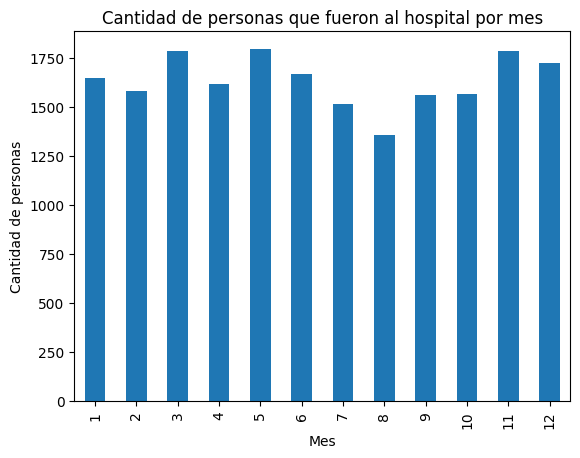

In [13]:
# Graficar la cantidad de personas que fueron al hospital por mes
df['INICIO_ATENCION'].groupby(df['INICIO_ATENCION'].dt.month).count().plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Cantidad de personas')
plt.title('Cantidad de personas que fueron al hospital por mes')
plt.show()


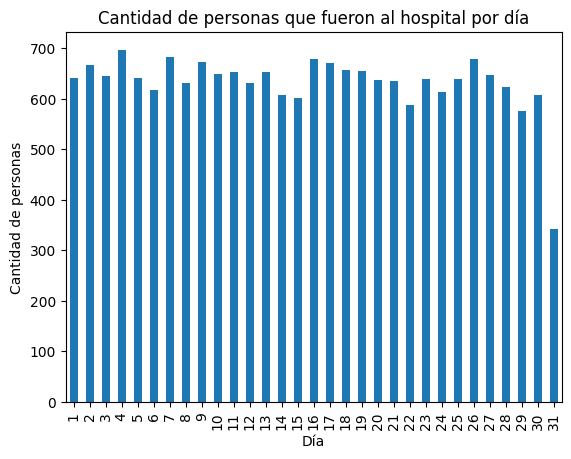

In [22]:
# cantidad de personas que van por día al hospital
df['INICIO_ATENCION'].groupby(df['INICIO_ATENCION'].dt.day).count().plot(kind='bar')
plt.xlabel('Día')
plt.ylabel('Cantidad de personas')
plt.title('Cantidad de personas que fueron al hospital por día')
plt.show()

In [14]:
# cuantas personas fueron al hospital por mes
df['INICIO_ATENCION'].groupby(df['INICIO_ATENCION'].dt.month).count()

INICIO_ATENCION
1     1645
2     1579
3     1785
4     1618
5     1795
6     1668
7     1512
8     1357
9     1559
10    1567
11    1785
12    1721
Name: INICIO_ATENCION, dtype: int64

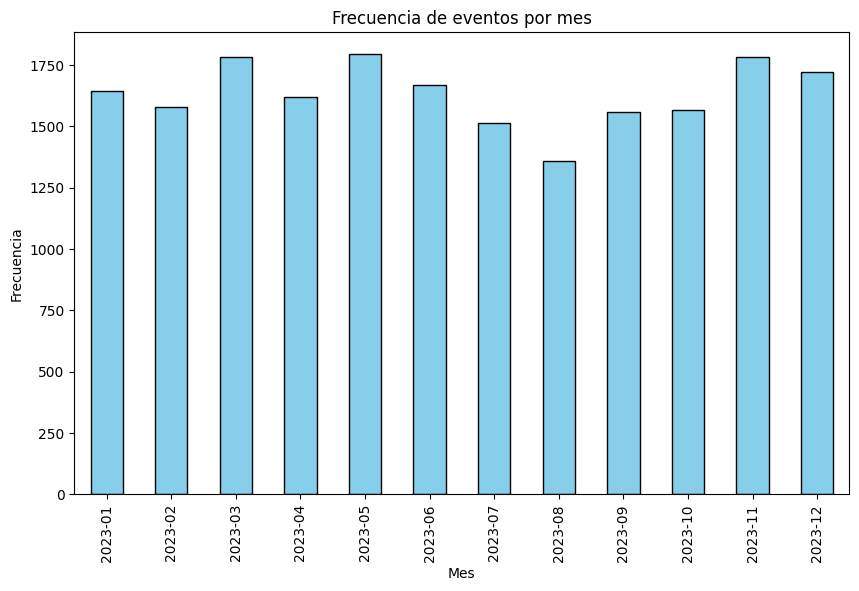

In [7]:
df['fecha_hora'] = pd.to_datetime(df['INICIO_ATENCION'])

# Agrupa los datos por mes y cuenta la frecuencia en cada mes
df_meses = df.groupby(df['fecha_hora'].dt.to_period("M")).size()

# Crea un gráfico de barras para visualizar la frecuencia de eventos en cada mes
plt.figure(figsize=(10, 6))
df_meses.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de eventos por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

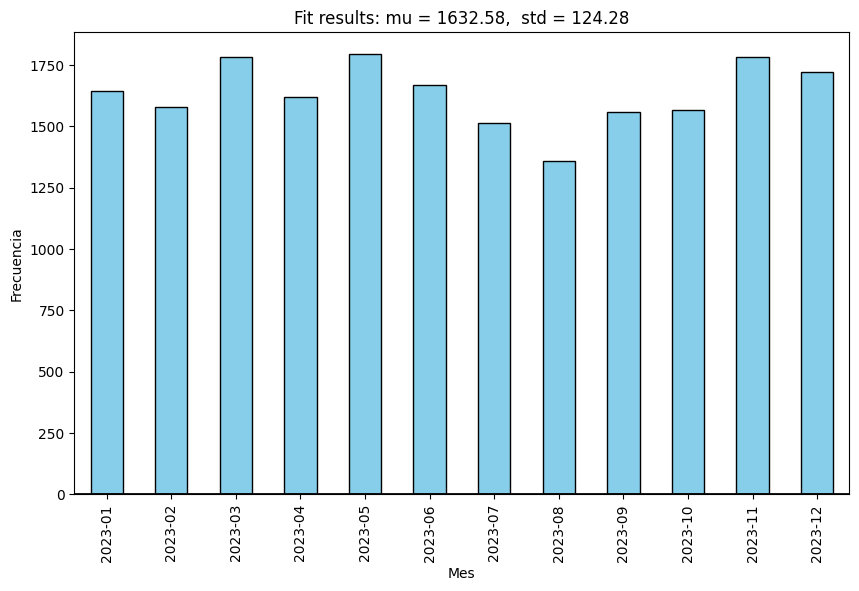

In [9]:
# Agrupa los datos por mes y cuenta la frecuencia en cada mes
df_meses = df.groupby(df['fecha_hora'].dt.to_period("M")).size()

# Ajusta una distribución normal a los datos mensuales
mu, std = norm.fit(df_meses)

# Crea un gráfico de barras para visualizar la frecuencia de eventos en cada mes
plt.figure(figsize=(10, 6))
df_meses.plot(kind='bar', color='skyblue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)6
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

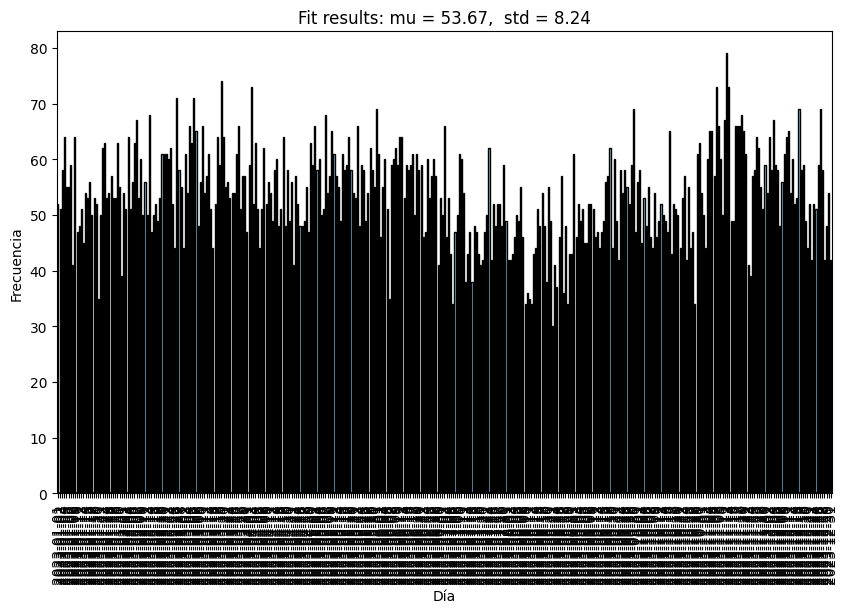

In [10]:
# Agrupa los datos por día y cuenta la frecuencia en cada día
df_dias = df.groupby(df['fecha_hora'].dt.to_period("D")).size()

# Ajusta una distribución normal a los datos diarios
mu, std = norm.fit(df_dias)

# Crea un gráfico de barras para visualizar la frecuencia de eventos en cada día
plt.figure(figsize=(10, 6))
df_dias.plot(kind='bar', color='skyblue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.show()